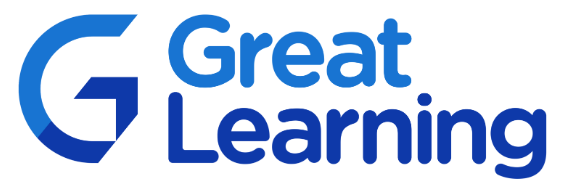

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.


# <font color='blue'> Machine Learning - Supervised Learning</font> <font color='Green'>- Linear Regression </font>
----


## <font color='blue'> Table of Contents </font>
- ### <font color='blue'> Data Cleaning. </font>
- ### <font color='blue'> Exploratory Data Analysis. </font>
- ### <font color='blue'> Univariate Analysis. </font>
- ### <font color='blue'> Bivariate Analysis. </font>
- ### <font color='blue'> Multivariate Analysis. </font>
- ### <font color='blue'> Multi Linear Regression model. </font>
- ### <font color='blue'> Model Evaluation and Conclusion. </font>


----

<font size=4 color='Green'> **Linear Regression** </font>
- <font size=3 > Linear regression is one of the easiest and most popular Machine Learning algorithms </font>
- <font size=3 > It is a statistical method that is used for predictive analysis </font>
- <font size=3 > Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc </font>
- <font size=3 > Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression </font>
- <font size=3 > Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable </font>
- <font size=3 > The linear regression model provides a sloped straight line representing the relationship between the variables as shown in the equation below: </font>
  - <font size=3 > y = b0 + b1*x + ε </font>
- Here:
  - <font size=3 > y = Dependent Variable (Target Variable) </font>
  - <font size=3 > x = Independent Variable (predictor Variable) </font>
  - <font size=3 > b0 = intercept of the line (Gives an additional degree of freedom) </font>
  - <font size=3 > b1 = Linear regression coefficient (scale factor to each input value) </font>
  - <font size=3 > ε = random error </font>
- <font size=3 > The values for x and y variables are training datasets for Linear Regression model representation </font>


<font size=4 color='Green'> **Linear Regression Case Study Description:** </font>
<font size=3> Airfares and passengers for U.S. Domestic Routes
for 4th Quarter of 2002. </font>

<font size=4 color='green'> **Variables/Columns:** </font>

-  **1. City1** - Origin (From) city.
- **2. City2** - Destination (to) city.
- **3. Average Fare (target feature)** - average cost (in USD) Origin -> Destination across all airlines.
- **4. Distance** - distance (in miles) Origin -> Destination.
- **5. Average weekly passengers** - average number of people flying Origin -> Destination per week.
- **6. Market Leading Airline(MLA)** -  abbreviated name of airline with the largest % market share that offers Origin -> Destination flight.
- **7. Market Share MLA** - percentage of market that the leading airline possesses.
- **8. Average Fare MLA** - average cost (in USD) that the leading airline charges for Origin -> Destination.
- **9. Low Price Airline(LPA)** -  abbreviated name of airline offering the lowest price for Origin -> Destination flight.
- **10. Market Share LPA** - percentage of market that the lowest price airline possesses.
- **11. Price LPA or Avergage Fare LPA** - actual price paid for this flight instance Origin -> Destination. </font> 

<font size=4 color='green'> **Source:** </font>  
<font size=3 > U.S. Department of Transportation </font>

<font size=4 color='Green'> **Objective:** </font>
<font size=3> The Goal is to predict the average flight fare using the provided input variables and a multi-linear regression model.</font>

<font color='Green' size=4>  1. Reading Source File and Checking Data <font color='Green'> 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [19]:
# to use unverified ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [20]:
# reading source file
file = pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", sep = '\s+', engine = 'python', header = None)

In [21]:
# Adding colunm names as mentioned in data file
file.columns = ['City1', 'City2', 'Average Flight Fare', 'Distance','Average Weekly Passengers',
                'Market Leading Airline (MLA)','Market Share MLA', 'Average MLA Fare', 
                'Low Price Airline (LPA)', 'Market Share LPA', 'Average LPA Fare']

In [22]:
file.head()

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


<font size=4 color='Green'>  2. Data Cleaning </font> 

In [23]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {file.shape}")
totalrows = file.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (1000, 11)
 Total number of rows in the dataset =  1000


In [24]:
# Check for duplicate records
len(file[file.duplicated()])

# No Duplicates found

0

In [25]:
# Checking Null colunms
file_nullcols = file.isnull().sum()
file_nullcols

# No null values are found

City1                           0
City2                           0
Average Flight Fare             0
Distance                        0
Average Weekly Passengers       0
Market Leading Airline (MLA)    0
Market Share MLA                0
Average MLA Fare                0
Low Price Airline (LPA)         0
Market Share LPA                0
Average LPA Fare                0
dtype: int64

In [26]:
# Checking data type of each colunm to check if any type needs to be changed
file.dtypes

City1                            object
City2                            object
Average Flight Fare             float64
Distance                          int64
Average Weekly Passengers       float64
Market Leading Airline (MLA)     object
Market Share MLA                float64
Average MLA Fare                float64
Low Price Airline (LPA)          object
Market Share LPA                float64
Average LPA Fare                float64
dtype: object

In [27]:
# Checking basic details of the data
file.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [28]:
# Mean of distance, Average Weekly Passengers, Market share is above median.

<font size=4 color='Green'>  3. Exploratory Data Analysis </font> 

<font size=4 color='Green'> 3.1. Univariate Analysis</font> 

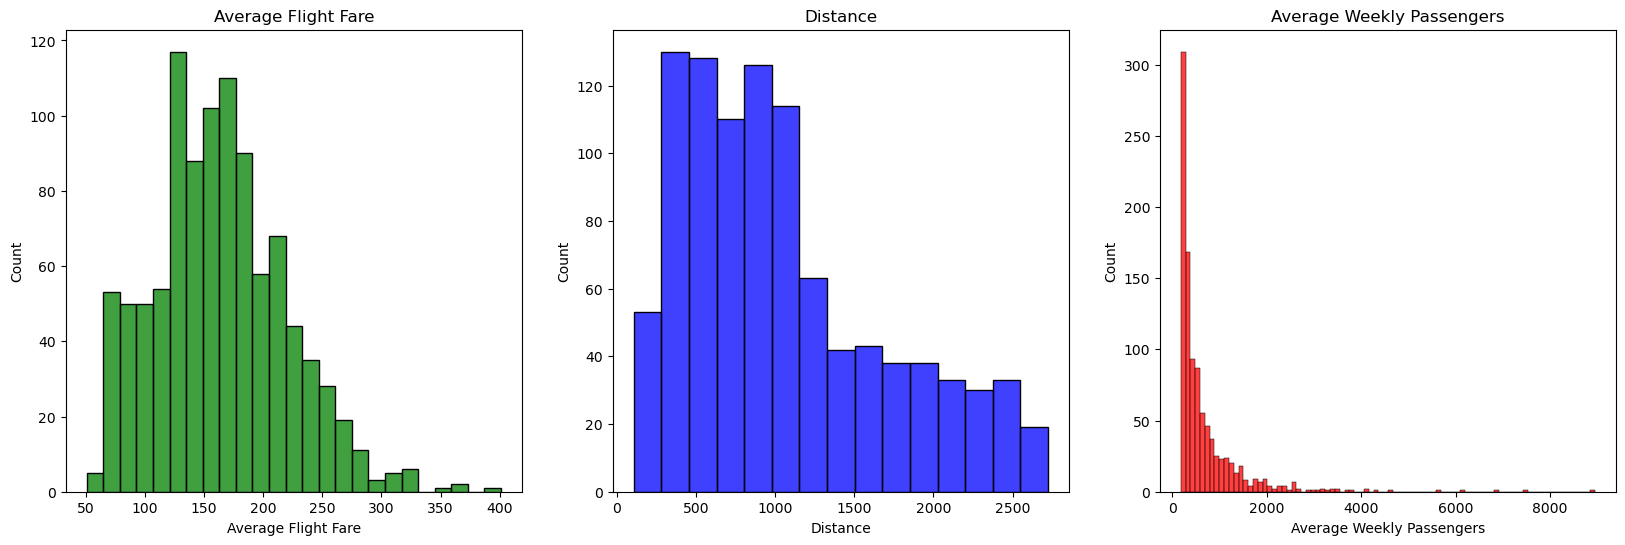

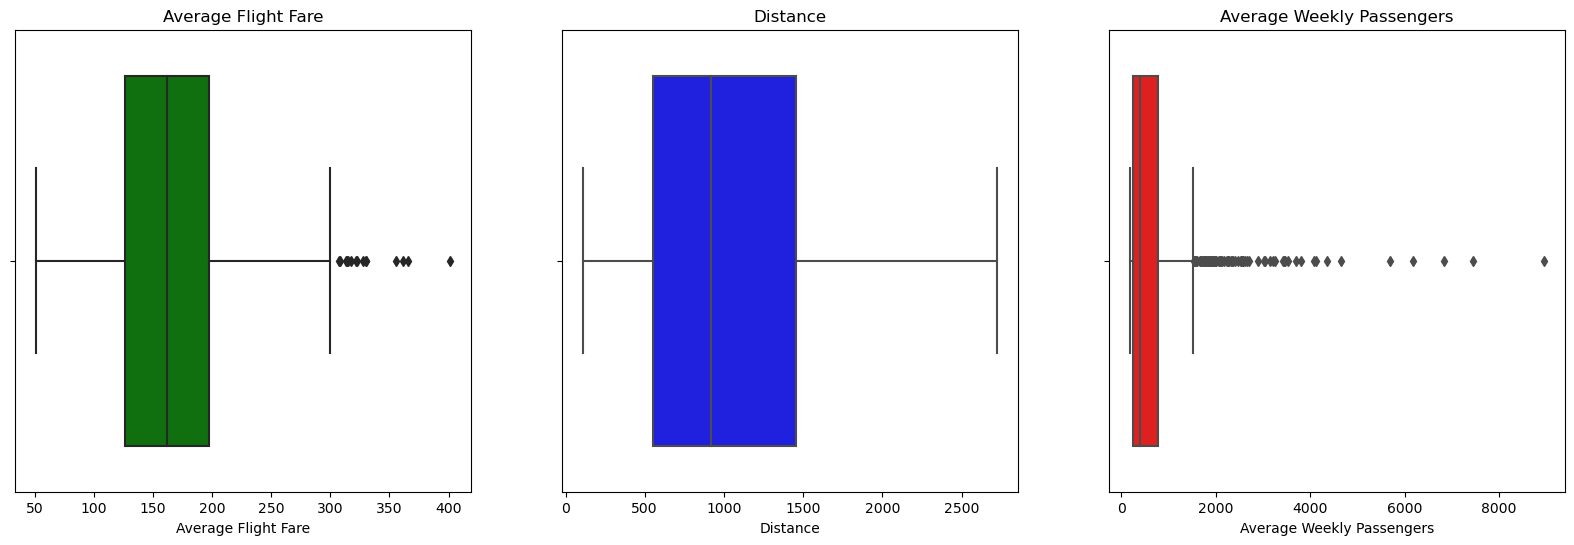

In [29]:
plt.figure(figsize = (20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.histplot(data = file, x = 'Average Flight Fare', color = 'green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.histplot(data = file, x = 'Distance', color = 'blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.histplot(data = file, x = 'Average Weekly Passengers', color = 'red')

plt.figure(figsize = (20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.boxplot(data = file, x = 'Average Flight Fare', color = 'green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.boxplot(data = file, x = 'Distance', color = 'blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.boxplot(data = file, x = 'Average Weekly Passengers', color = 'red')
plt.show()

<font size=4> **Inference** </font>
- Most of the flight fare lie between 100 to 300 with some outliers.
- Average distance ranges between 500 to 2500.
- Most of the time Average Weekly Passenger numer is less than 2000 but there are large number of outliers.
--------------------

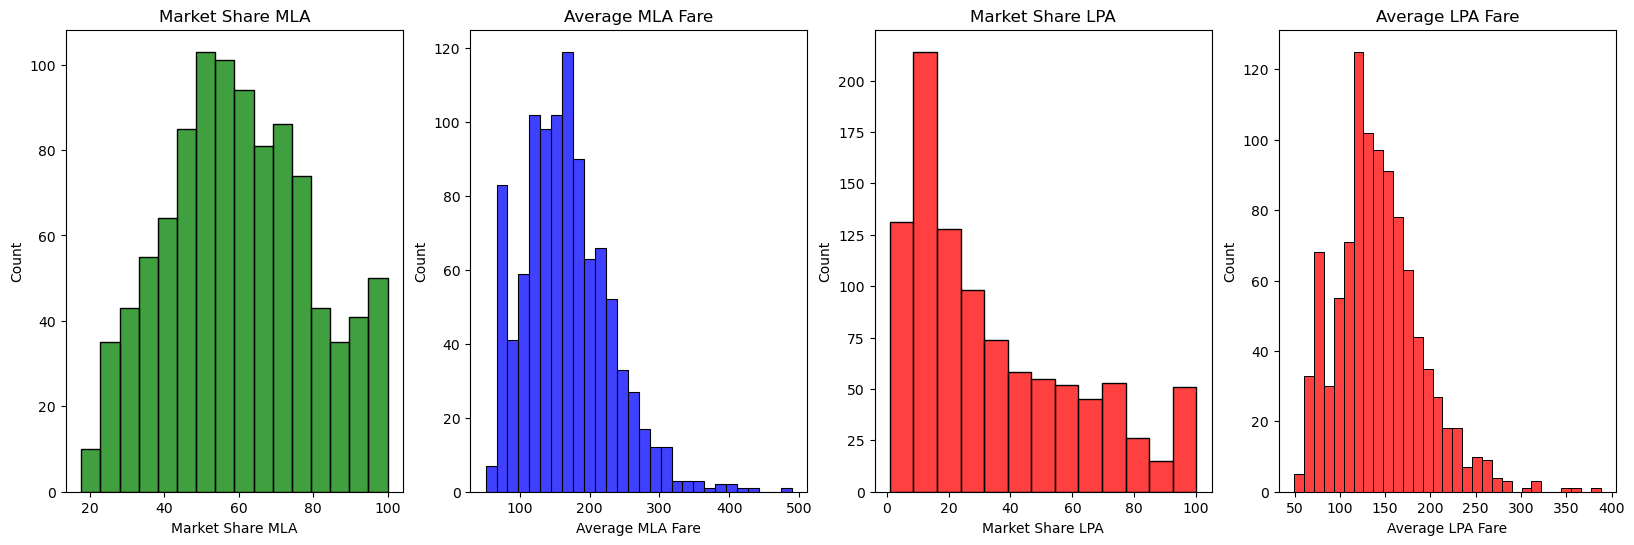

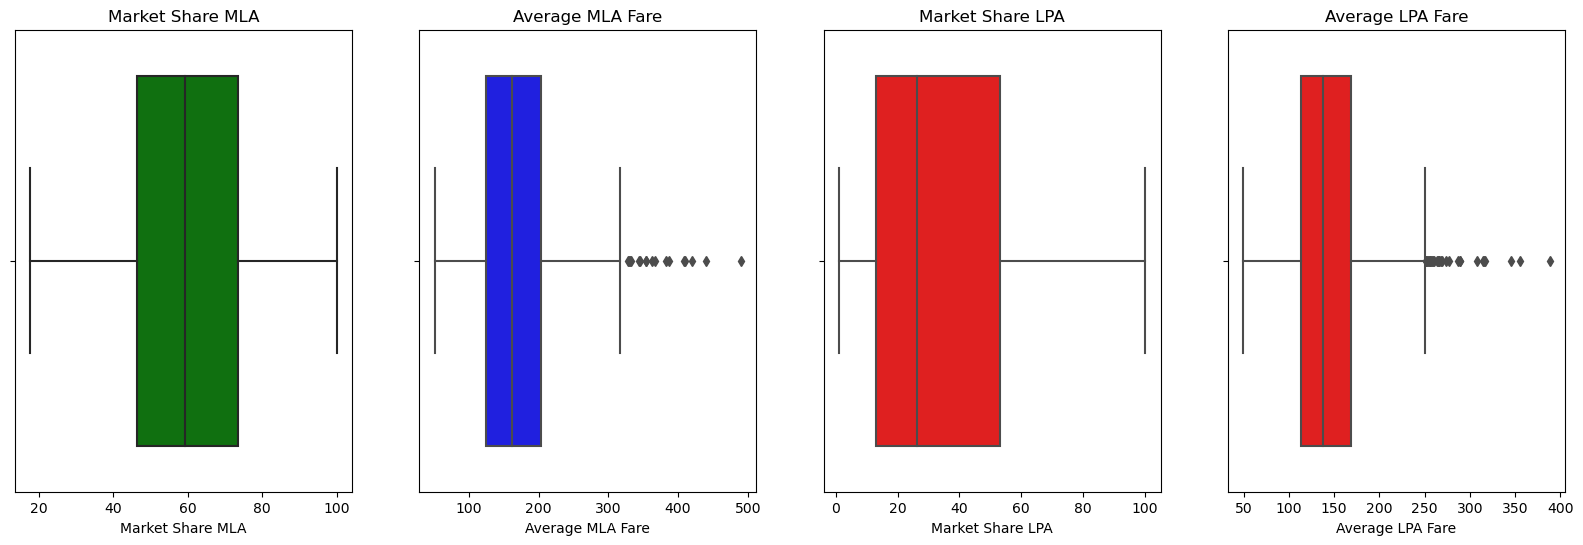

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.histplot(data = file, x = 'Market Share MLA', color = 'green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.histplot(data = file, x = 'Average MLA Fare', color = 'blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.histplot(data = file, x = 'Market Share LPA', color = 'red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.histplot(data = file, x = 'Average LPA Fare', color ='red')


plt.figure(figsize = (20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.boxplot(data = file, x = 'Market Share MLA', color = 'green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.boxplot(data = file, x = 'Average MLA Fare', color ='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.boxplot(data = file, x = 'Market Share LPA', color ='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.boxplot(data = file, x = 'Average LPA Fare', color ='red')
plt.show()

<font size=4> **Inference** </font>

- Average fare of both Market Leader and Low Price Airline range from 100 to 300 with some outliers.
- Market Leader has 40 to 80 percent market share on most routes.
- Lower Price airline has less than 40 percent market share on most of the routes.
---------------------

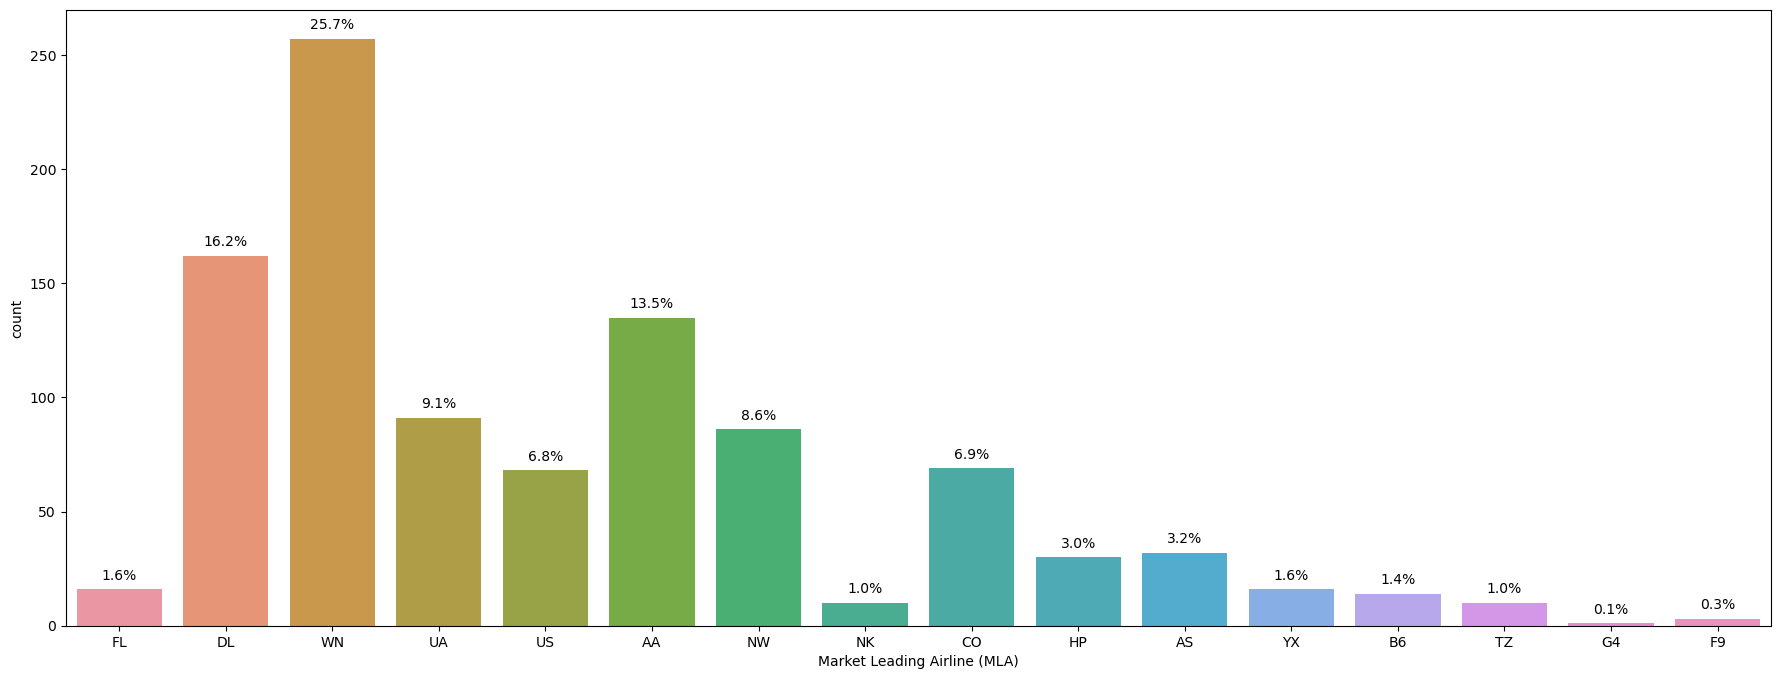

In [31]:
fig, ax = plt.subplots(figsize = (20,8))
width = len(file['Market Leading Airline (MLA)'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = file, x = 'Market Leading Airline (MLA)') 

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(file)*100, decimals = 2))) + '%', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

<font size=4> **Inference** </font>
- WN followed by DL happens to be market leader airline on most of the routes.
-----------------

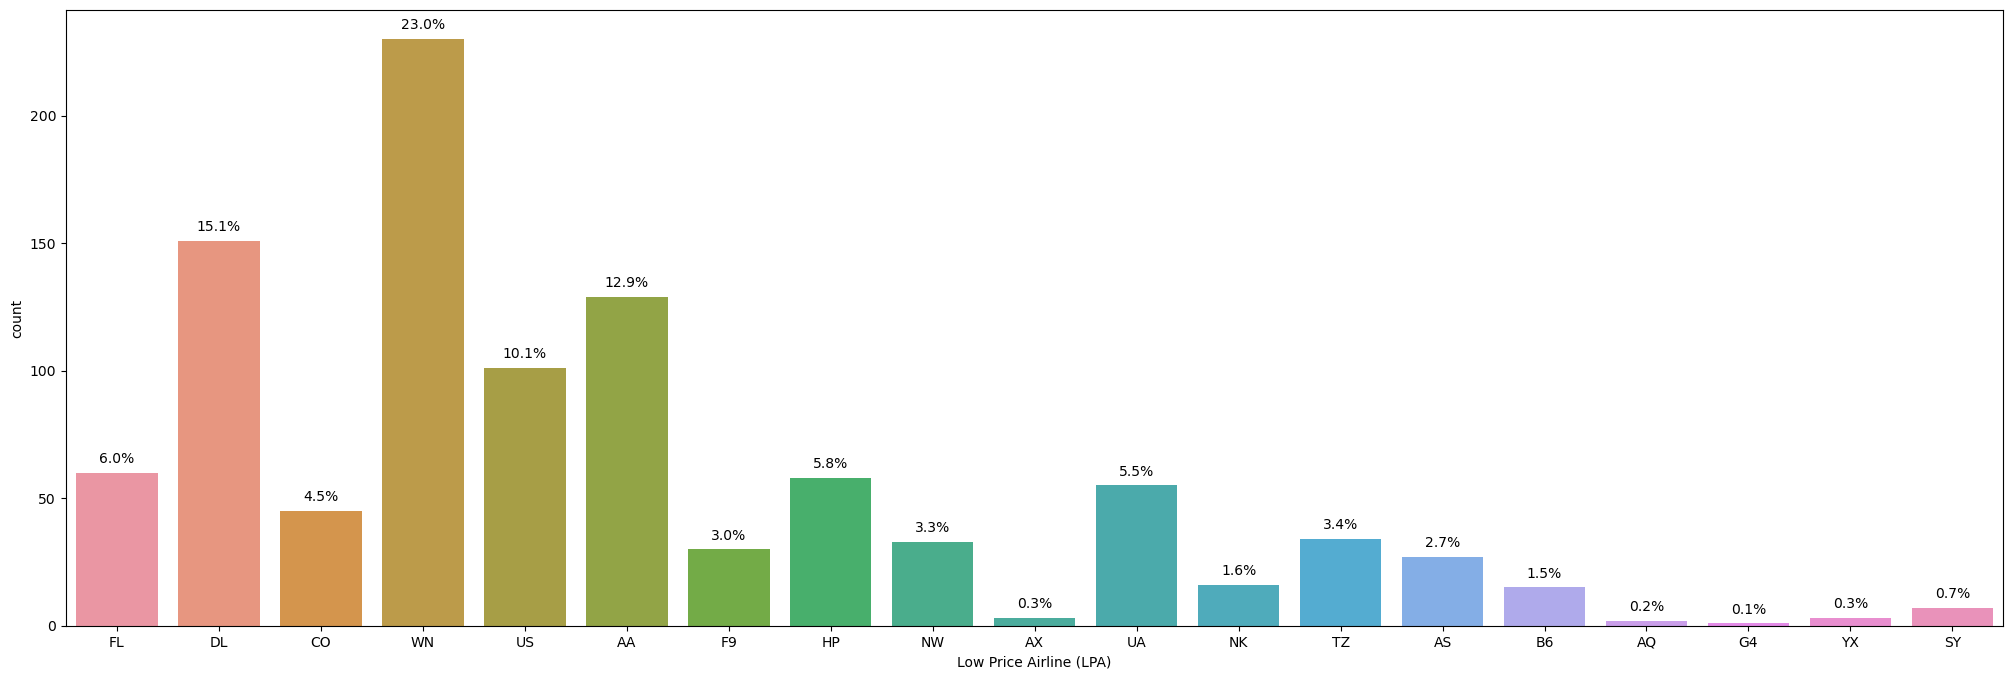

In [32]:
fig, ax = plt.subplots(figsize = (20,8))
width = len(file['Low Price Airline (LPA)'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = file, x = 'Low Price Airline (LPA)') 

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(file)*100, decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', 
                va = 'center', xytext=(0, 10), textcoords = 'offset points')

<font size=4> **Inference** </font>
- WN followed by DL happens to be the low price airline on most routes.
-------------------

<font size=4 color='Green'>  3.2. Bivariate Analysis </font> 

In [55]:
# Correlation Coefficient
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = file.corr(numeric_only=True)
corr.style.background_gradient(cmap = 'coolwarm')

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
Average Flight Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average Weekly Passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
Market Share MLA,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average MLA Fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
Market Share LPA,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
Average LPA Fare,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


<font size=4> **Inference** </font>
- Average Flight fare is most correlated to fare of market leader and low performing flight.
-------------------

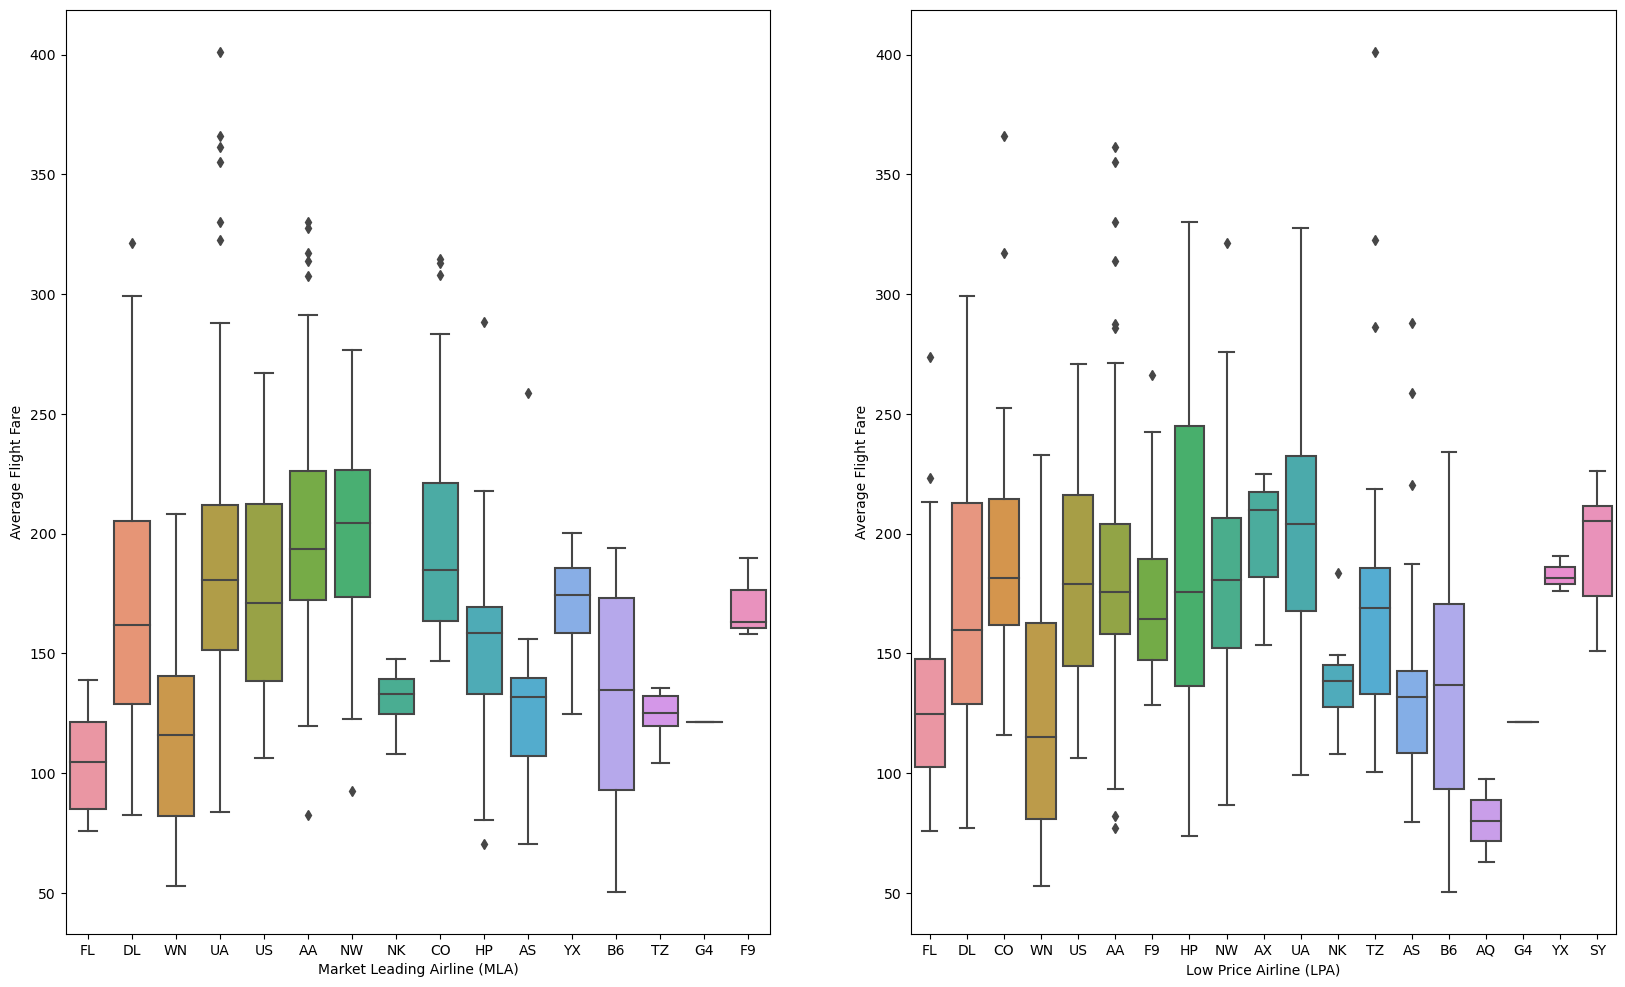

In [34]:
# Let us check with conditional boxplot to understand the relation better
plt.figure(figsize = (20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'Market Leading Airline (MLA)', y = 'Average Flight Fare', data = file)
plt.subplot(1,2,2)
sns.boxplot(x = 'Low Price Airline (LPA)', y = 'Average Flight Fare', data = file)
plt.show()

<font size=4> **Inference** </font>
- Most flights have comparable median flight fare with some having very low values.
- Flight fare of market leading airline and Low Price airline seem to fall in similar range.
------------------

<font size=4 color='Green'>  4. Multivariate Plot and Scatter Plot</font> 

<font size=4 color='Green'>  4.1. Pair Plot </font> 

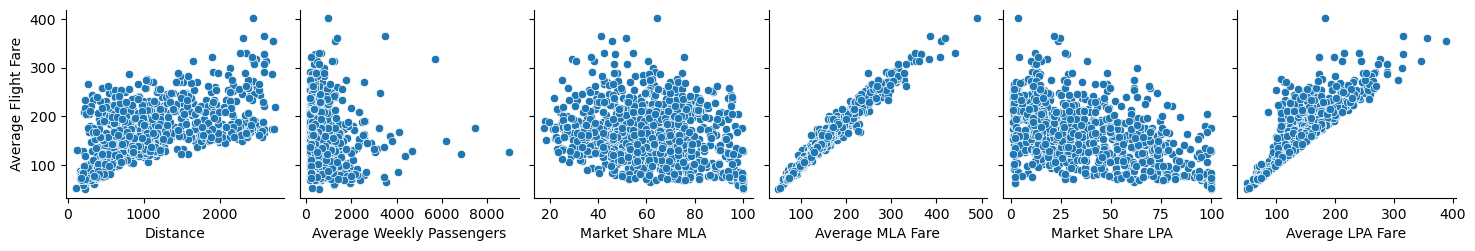

In [35]:
sns.pairplot(file, y_vars = 'Average Flight Fare', x_vars = ["Distance", "Average Weekly Passengers",'Market Share MLA',
                                                             'Average MLA Fare','Market Share LPA','Average LPA Fare'])
plt.show()

<font size=4> **Inference** </font>
- Average Flight fare is most corelated to fare of market leader and low performing flight with mild corelation with Distance as well.
-----------

<font size=4 color='Red'>  **Please Note:** </font>
    
<font size=3>  **Variabes need to be scaled before further analysis**  </font>.
<font size=3> **Transformation seems unnecessary as most data points don't show any clear trend with Average flight Fare.** </font> 
<font size=3> **Still checkking effect of log transformation on the data set.** </font>

In [36]:
# Log Transformation of independent variables
D1 = np.log(file['Distance'])
D2 = np.log(file['Average Weekly Passengers'])
D3 = np.log(file['Market Share MLA'])
D4 = np.log(file['Average MLA Fare'])
D5 = np.log(file['Market Share LPA'])
D6 = np.log(file['Average LPA Fare'])

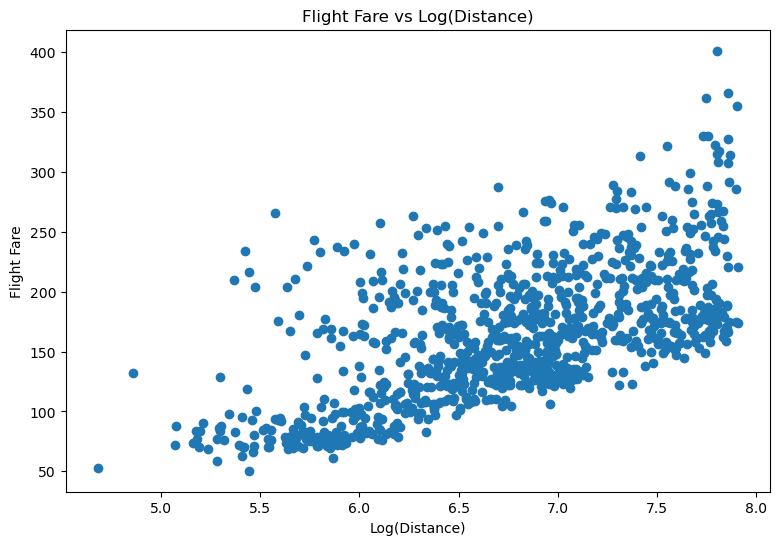

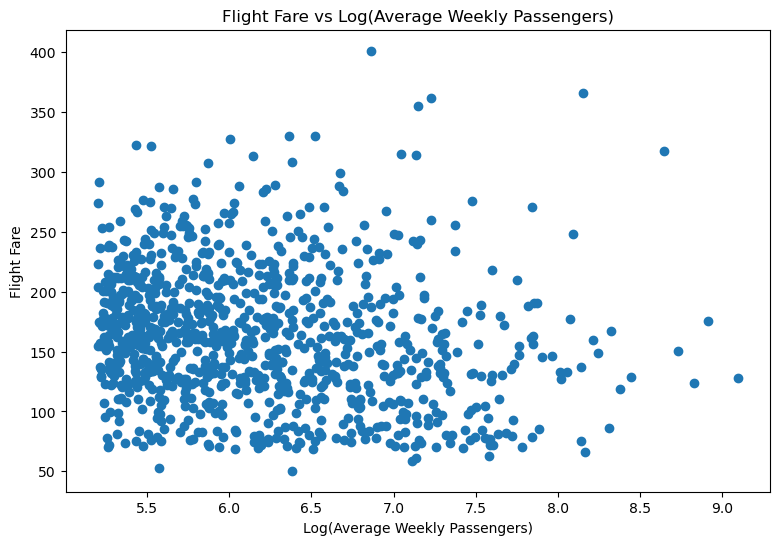

In [37]:
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.title('Flight Fare vs Log(Distance)')
plt.scatter( D1, file['Average Flight Fare'])
plt.xlabel('Log(Distance)')
plt.ylabel('Flight Fare')


plt.figure(figsize = (20,6))
plt.subplot(1, 2, 2)
plt.title('Flight Fare vs Log(Average Weekly Passengers)')
plt.scatter( D2, file['Average Flight Fare'])
plt.xlabel('Log(Average Weekly Passengers)')
plt.ylabel('Flight Fare')
plt.show()

<font size=4 color='green'> **Inference:** </font> 
- Given Transformation does'nt seem to be adding much value, so raw data to be used for further analysis
---------------

### <font color='green'>  4.2. Multi Linear Regression Model <font color='green'> 

In [ ]:
# Dropping cities and Flight Name column as these are not actionable.

In [38]:
file.drop(['City1'], axis = 1, inplace = True)
file.drop(['City2'], axis = 1, inplace = True)
file.drop(['Market Leading Airline (MLA)'], axis = 1, inplace = True)
file.drop(['Low Price Airline (LPA)'], axis = 1, inplace = True)

<font size=3 color='green'>  4.2.1. Rescaling the Features </font> 

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'dummy' variables
variables = ['Average Flight Fare', 'Distance', 'Average Weekly Passengers', 'Market Share MLA', 
        'Average MLA Fare','Market Share LPA', 'Average LPA Fare']

file[variables] = scaler.fit_transform(file[variables])

In [42]:
file.head()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
0,0.182344,0.160550,0.027727,0.637877,0.137676,0.698706,0.181539
1,0.205155,0.287462,0.010882,0.697522,0.165116,0.163432,0.204918
2,0.467338,0.284404,0.003917,0.743562,0.394667,0.017283,0.347324
3,0.053834,0.068807,0.048513,0.963192,0.041728,0.969375,0.056897
4,0.306835,0.235092,0.015010,0.268586,0.252190,0.144330,0.283185


In [43]:
file.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.321791,0.362757,0.055976,0.515653,0.264221,0.338503,0.276603
std,0.157867,0.245873,0.087409,0.235274,0.142568,0.273873,0.139595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215149,0.170298,0.008642,0.350219,0.167380,0.122650,0.189630
50%,0.316002,0.310015,0.025472,0.504859,0.252281,0.253487,0.260737
75%,0.418786,0.513953,0.067109,0.678207,0.346881,0.524687,0.351491
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font size=3 color='green'>   4.2.2. Splitting Data into Training and Test </font>

In [44]:
## Splitting the dataset.
np.random.seed(0)

from sklearn.model_selection import train_test_split
file_train, file_test = train_test_split(file, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
y_train = file_train.pop('Average Flight Fare')
X_train = file_train

In [46]:
y_test = file_test.pop('Average Flight Fare')
X_test = file_test

<font size=3 color='green'> 4.2.3. Fitting Regression Model </font>

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
print(lr_model.coef_)
file.columns

[ 0.01608207 -0.01847207  0.01984823  0.88350961 -0.02116117  0.21999856]


Index(['Average Flight Fare', 'Distance', 'Average Weekly Passengers',
       'Market Share MLA', 'Average MLA Fare', 'Market Share LPA',
       'Average LPA Fare'],
      dtype='object')

In [50]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.9734680065850925
0.9756468855793664


In [51]:
# Model Prediction

y_pred = lr_model.predict(X_test)

# Taking the inverse transform the predicted data
#y_predict_orig = scaler.inverse_transform(y_pred)
#y_test_orig = scaler.inverse_transform(y_test)

In [53]:
#k-->no of col,n-->no of rows
k = X_test.shape[1]
n = len(X_test)
print(k,n)

6 300


In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.025 
MSE = 0.0006235276486579628 
MAE = 0.017816194523768366 
R2 = 0.9756468855793664 
Adjusted R2 = 0.975148186990548


<font size=4 color='green'>  **Conclusions:** </font> 

<font size=3> **Understanding from EDA:** </font>
- <font size=3> Most of the flight fare lie between 100 to 300 with some outliers
- Average distance ranges between 500 to 2500
- Most of the time Average Weekly Passenger numer is less than 2000 but there are large number of outliers  
- Average fare of both Market Leader and Low Price Airline range from 100 to 300 with some outliers
- Market Leader has 40 to 80 percent market share on most routes
- Lower Price airline has less than 40 percent market share on most of the routes
- Most flights have comparable median flight fare with some having very low values
- Flight fare of market leading airline and Low Price airline seem to fall in similar range </font>

<font size=3> **Understanding from Model Scores:** </font>
- The model is performing much better
- All the losses very less and the R2, Adjusted R2 scores are almost equal to 1.

-------
### Happy Learning :)
-------